# ETL
el dataset a analizar es 'AccidentesAviones.csv', en una vista preliminar necesita ciertos arreglos.

## Importamos las librerías necesarias y cargamos el archivo

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import missingno as msn
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [8]:

df = pd.read_csv('Datasets/AccidentesAviones.csv')
df.shape

(5008, 18)

In [7]:
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

El dataset comprende 5008 datos distribuidos en 18 columnas. Ahora nos adentraremos en un examen detallado de cada columna. Dado que carecemos de un diccionario de datos, procederemos a investigar la información que tenemos a nuestra disposición. Tras revisar varias fuentes, hemos determinado que nuestro resumen del diccionario de datos es el siguiente:

Diccionario de datos:
- **Unnamed: 0:** índice para cada registro de accidente aéreo
- **fecha:** fecha en la que ocurrió el accidente aéreo
- **HORA declarada:** hora declarada del accidente aéreo
- **Ruta:** ubicación geográfica donde ocurrió el accidente aéreo
- **OperadOR:** compañía aérea operadora del vuelo
- **flight_no:** número de vuelo
- **route:** ruta del vuelo, indicando los puntos de partida y destino
- **ac_type:** tipo de aeronave involucrada en el accidente
- **registration:** número de registro o matrícula de la aeronave
- **cn_ln:** número de serie de la aeronave
- **all_aboard:** total de personas a bordo (pasajeros y tripulación)
- **PASAJEROS A BORDO:** total de pasajeros a bordo
- **crew_aboard:** total de tripulación a bordo
- **cantidad de fallecidos:** total de personas fallecidas en el accidente (pasajeros y tripulación)
- **passenger_fatalities:** total de pasajeros fallecidos en el accidente
- **crew_fatalities:** total de tripulantes fallecidos en el accidente
- **ground:** total de personas en tierra fallecidas en el accidente
- **summary:** tesumen del accidente de vuelo y las circunstancias

In [10]:
#Observamos que la información de la columna Unnamed 0, corresponde con el índice y procedemos a eliminarla para que no haya información repetida
df=df.drop(columns=['Unnamed: 0'])

In [11]:
#Vamos a renombrar las columnas para normalizar los nombres y que estén todos en inglés y representen el contenido de la columna
df = df.rename(columns={'fecha': 'date'})
df = df.rename(columns={'HORA declarada': 'time'})
df = df.rename(columns={'Ruta': 'location'})
df = df.rename(columns={'OperadOR': 'airline_operator'})
df = df.rename(columns={'OperadOR': 'operator'})
df = df.rename(columns={'ac_type': 'aircraft_type'})
df = df.rename(columns={'PASAJEROS A BORDO': 'passengers_aboard'})
df = df.rename(columns={'cantidad de fallecidos': 'total_fatalities'})

In [12]:
#Las columnas quedarían 
df.columns.values

array(['date', 'time', 'location', 'airline_operator', 'flight_no',
       'route', 'aircraft_type', 'registration', 'cn_ln', 'all_aboard',
       'passengers_aboard', 'crew_aboard', 'total_fatalities',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype=object)

Tras un análisis detallado de la información en el dataframe, hemos identificado numerosos casos en los que en lugar de encontrarse valores vacíos o nulos, se utilizó el signo de interrogación '?'. En consecuencia, hemos optado por reemplazar estos valores por 'NaN' con el fin de detectar los verdaderos valores nulos.

In [14]:
#Reemplazamos los '?' por Nan
df = df.replace('?', np.nan)


In [15]:
#Revisamos que se haya realizado correctamente la modificación
df.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


Chequeamos los valores nulos en el dataset

In [16]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis = 1)
missing.columns = ["count", "%"]
missing.sort_values(by = "%", ascending = False)

,count,%
flight_no,3682,73.522364
time,1504,30.031949
route,762,15.215655
cn_ln,667,13.318690
registration,272,5.431310
crew_fatalities,235,4.692492
passenger_fatalities,235,4.692492
passengers_aboard,221,4.412939
crew_aboard,219,4.373003
summary,59,1.178115


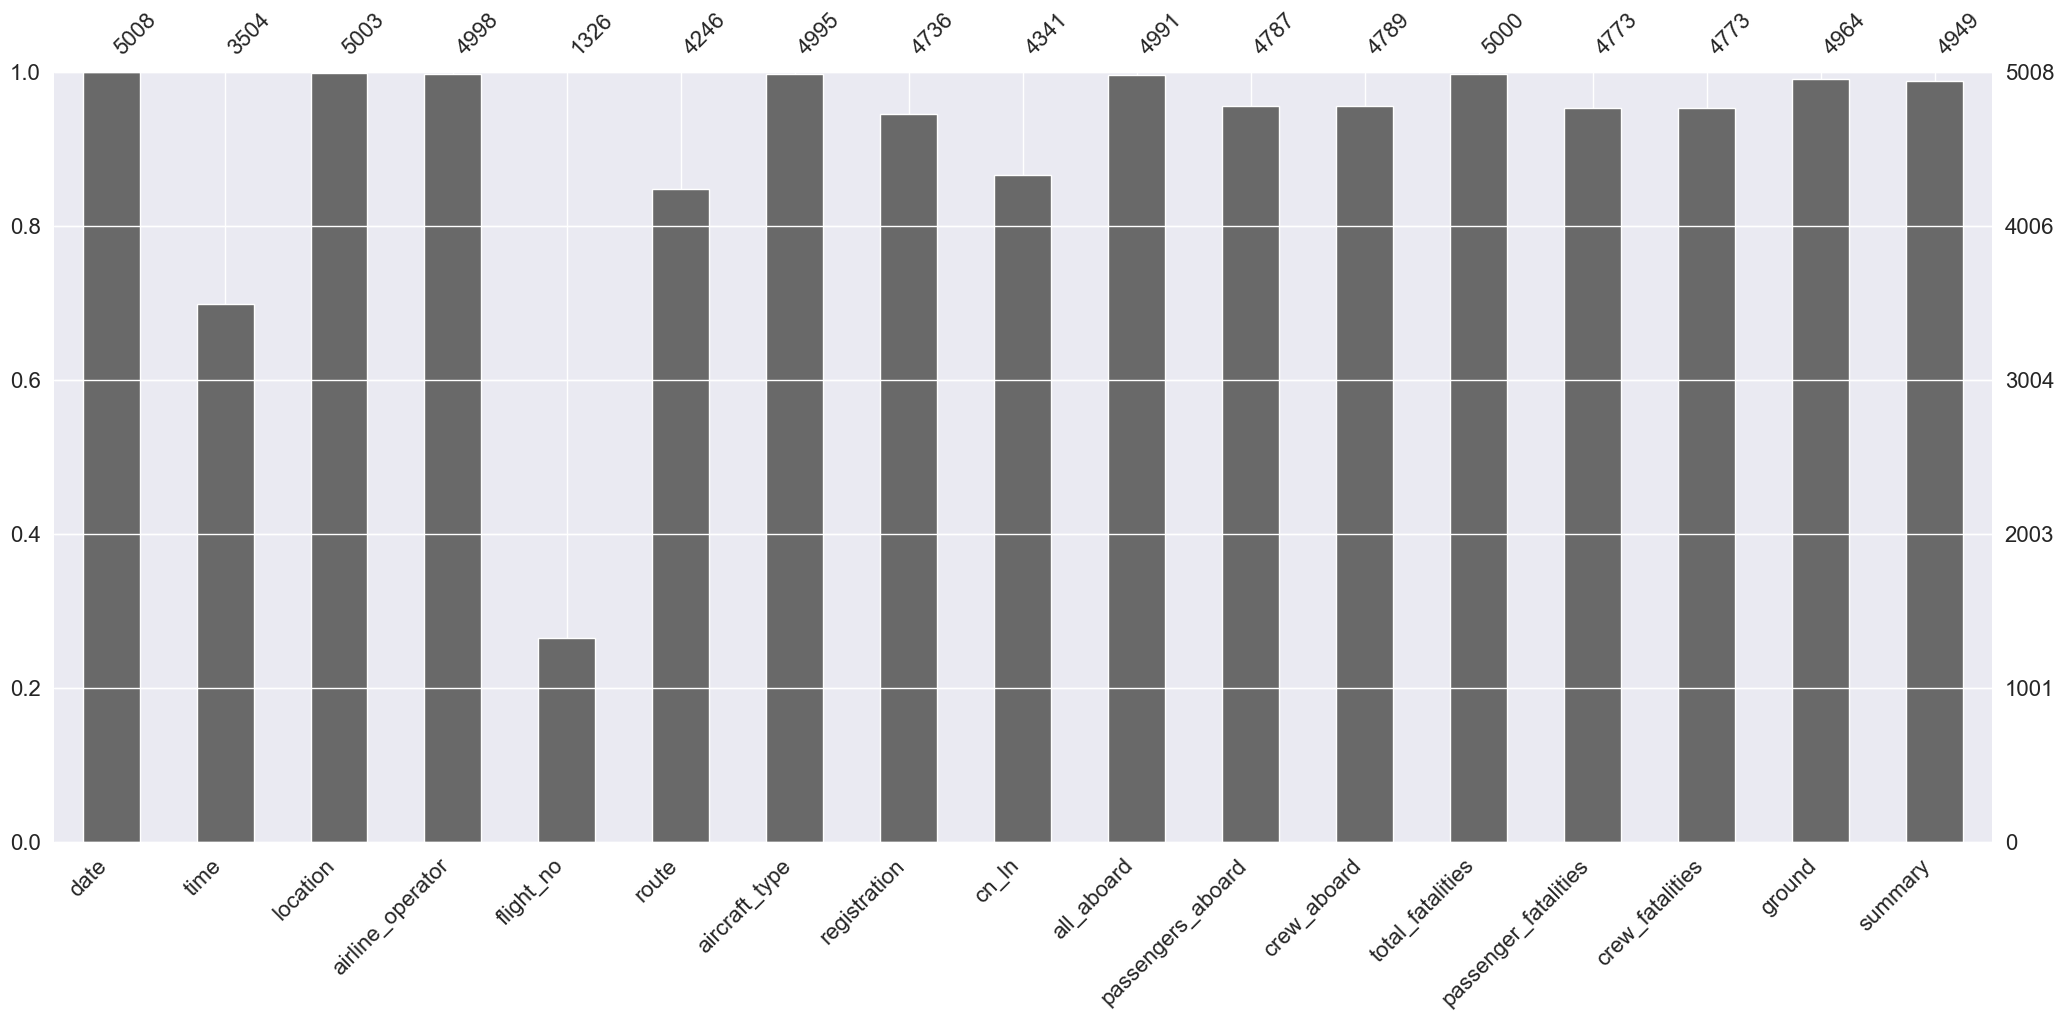

In [21]:
msn.bar(df)
plt.show()

Debido a la alta cantidad de valores nulos en la columna de número de vuelo (flight_no), hemos tomado la decisión de eliminarla.

In [12]:
df = df.drop(columns=['flight_no'])

In [22]:
df.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


Veremos en esta instancia si tenemos valores duplicados

In [23]:
#Verificamos si hay duplicados
duplicados = df[df.duplicated()] 
duplicados

,date,time,location,airline_operator,flight_no,route,aircraft_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary


Podemos ver que no tenemos valores duplicados

In [24]:
#Revisamos los tipos de datos para comenzar con las transformaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   time                  3504 non-null   object
 2   location              5003 non-null   object
 3   airline_operator      4998 non-null   object
 4   flight_no             1326 non-null   object
 5   route                 4246 non-null   object
 6   aircraft_type         4995 non-null   object
 7   registration          4736 non-null   object
 8   cn_ln                 4341 non-null   object
 9   all_aboard            4991 non-null   object
 10  passengers_aboard     4787 non-null   object
 11  crew_aboard           4789 non-null   object
 12  total_fatalities      5000 non-null   object
 13  passenger_fatalities  4773 non-null   object
 14  crew_fatalities       4773 non-null   object
 15  ground                4964 non-null   

## 2. Transformaciones: ciertas columnas necesitan formateo tanto en su tipo de dato, como presentacion, tambien crearemos columnas que ayudaran en el posterior análisis

### Date

In [25]:
from datetime import datetime
def convertir_fecha(fecha):
    fecha_objeto = datetime.strptime(fecha, '%B %d, %Y')
    return fecha_objeto

In [26]:
# Aplicamos la conversión a la columna 'date'
df['date'] = df['date'].apply(convertir_fecha)

In [27]:
df['date']

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: date, Length: 5008, dtype: datetime64[ns]

esta columna afortunadamente carece de nulos.

In [28]:
#Verificamos que el tipo de dato sea datetime
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: date
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


Vamos a crear la columna year, que nos permitirá facilitar el análisis de los accidentes por año, década o cualquier otra medida de tiempo.

In [29]:
df['year'] = df['date'].dt.year

###  Hora

In [30]:
#Observamos cómo están los datos en la columna time
df['time']

0        1718
1         NaN
2        0630
3         NaN
4        1830
        ...  
5003     1835
5004     1800
5005     0800
5006    11:30
5007     1500
Name: time, Length: 5008, dtype: object

In [31]:
# Agregamos ':' entre los números en la columna 'time'
df['time'] = df['time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [32]:
#Verificamos el agregado de los ':' en la columna tiempo
df['time'].head()

0    17:18
1      NaN
2    06:30
3      NaN
4    18:30
Name: time, dtype: object

In [33]:
#Verificamos el numero de valores nulos
df['time'].isnull().sum()

1504

In [34]:
# Reemplazamos los valores nulos por un valor vacío
df['time'] = df['time'].fillna('')

In [35]:
#Verificamos el tipo de dato actual
df['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
5008 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [36]:
#Cambiamos el tipo de dato 
df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce').dt.time

In [37]:
#Revisamos el cambio a datetime con formato de hora
df['time'].head()

0    17:18:00
1         NaT
2    06:30:00
3         NaT
4    18:30:00
Name: time, dtype: object

In [38]:
#Vemos los nulos NaT y volvemos a rellenar con vacíos
df['time'] = df['time'].fillna('')

In [39]:
#Constatamos el cambio
df['time'].head()

0    17:18:00
1            
2    06:30:00
3            
4    18:30:00
Name: time, dtype: object

###  Date_time

In [40]:
# Concatenar las columnas 'date' y 'time' en una columna 'date_time' de tipo datetime
df['date_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [41]:
# Convertir la columna 'date' a tipo de datos datetime
df['date'] = pd.to_datetime(df['date'])

In [42]:
#Llenamos con los Nan con vacíos
df['date_time'] = df['date_time'].fillna('')


In [43]:
#Revisamos el cambio
df['date_time'].head()

0   1908-09-17 17:18:00
1                   NaT
2   1912-07-12 06:30:00
3                   NaT
4   1913-09-09 18:30:00
Name: date_time, dtype: datetime64[ns]

###  Location


In [44]:
df['location'].isnull().sum()

5

In [45]:
df[df['location'].isnull()]

,date,time,location,airline_operator,flight_no,route,aircraft_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary,year,date_time
360,1934-12-31,,NaN,Aeroflot,NaN,NaN,Tupolev ANT-9,NaN,NaN,10,8,2,10,8,2,0,Crashed under unknown circumstances.,1934,NaT
465,1937-06-20,,NaN,ENTA,NaN,San José San Isidro de El General,Travel Air 6000,TI-3,NaN,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...,1937,NaT
646,1942-08-21,,NaN,Deutsche Lufthansa,NaN,NaN,Siebel Si-204,NaN,NaN,4,2,2,4,2,2,0,"Lufthansa chairman, Von Gablenz killed.",1942,NaT
999,1947-11-27,,NaN,China National Aviation Corporation,NaN,NaN,Douglas DC-3,NaN,NaN,3,0,3,2,0,2,0,The cargo plane was shot down by communist ant...,1947,NaT
2895,1977-01-20,,NaN,North Canada Air,NaN,NaN,Bristol 170 Freighter 31M,C-FWAD,13253,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...,1977,NaT


Vamos a complementar buscando información sobre esas fechas, para intentar determinar las locaciones. En particular para esta sección utilicé el siguiente enlace buscando por las fechas indicadas y verificando con la información de las otras columnas que efectivamente sea el mismo accidente. https://aviation-safety.net/wikibase/

El único valor donde pudimos complementar la información fue el indice=999. https://aviation-safety.net/database/record.php?id=19471127-1

In [46]:
df.loc[999, 'location']= 'Yakutat, AK, United States'

In [47]:
df.loc[999, 'registration']='NC95486'

In [49]:
df.iloc[999]

date                                                  1947-11-27 00:00:00
time                                                                     
location                                       Yakutat, AK, United States
airline_operator                      China National Aviation Corporation
flight_no                                                             NaN
route                                                                 NaN
aircraft_type                                                Douglas DC-3
registration                                                      NC95486
cn_ln                                                                 NaN
all_aboard                                                              3
passengers_aboard                                                       0
crew_aboard                                                             3
total_fatalities                                                        2
passenger_fatalities                  

Se extrae del material complementario la lista de países donde ocurrieron accidentes aéreos. Se hicieron algunas modificaciones en función a cómo aparecían los países en la lista: Por ej se reemplazó United Kingdom por UK.

In [50]:
countries_with_accidents=[ "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia","Australia","Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium","Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria","Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
"Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia","Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica","Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia","Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece","Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary","Iceland", "Island", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan","Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia","Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali","Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
"Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua","Nigeria", "Niger",  "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau","Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico","Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia","Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland","Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia","South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago","Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom","United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

In [51]:
#Reemplazamos los nulos por los vacíos
df['location'] = df['location'].fillna('Sin dato')

In [52]:
# Definimos la función que colocará los valores en 'country'
# Si no encuentra coincidencia en 'location' colocará 'other'

def obtener_pais(location):
    for country in countries_with_accidents:
        if country.lower() in location.lower():
            return country
    return 'other'

In [53]:
# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df['country'] = df['location'].apply(obtener_pais)

In [54]:
df['country'].isnull().sum()

0

In [55]:
df[df['country']=='other'].shape

(1238, 20)

Podemos verificar que hay 1238 registros que no tienen un país asociado. Si revisamos el la columna location, de los registros que no tienen asignado un país (tienen other en la columna country), la mayoría se corresponde con ciudades de Estados Unidos. 
De esta manera insertaremos para esos registros el valos "United States"

In [56]:
ee_uu_states= ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Calilfornia", "Californiia", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine","Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
"Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio","Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas","Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [57]:
df.loc[df['location'].str.contains('|'.join(ee_uu_states), case=False, na=False), 'country'] = 'United States'

In [58]:
df_no_location=df[df['country']=='other']

In [59]:
df_no_location.shape

(297, 20)

Tenemos 297 valores donde no es posible identificar correctamente el país al que pertenece. Vamos a ver los valores de la columna location.

In [60]:
df_no_location['location'].unique()

array(['Over the North Sea', 'Near Jambol, Bulgeria',
       'Over the Mediterranean', 'English Channel off Forkstone, Kent',
       'Catherham, Surrey, UK', 'Cartagena, Columbia',
       'Mendotta, Minnisota', 'Off Gibraltar', 'Mitchel Field, NY',
       'North Atlantic Ocean', 'Over the Mediterranean Sea', 'Egbert, WY',
       'Over the English Channel', 'English Channel',
       'Leigh, Kent, Unied Kingdom', 'Atlantic Ocean',
       "L'Hospitalet, Ariège", 'Algiers', 'Saint Catharines, Ontario',
       'Terranova Pausania, East Sardinia', 'Near Sandoway, Burma',
       'Off Algiers', 'Colvin Park, Ilinois', 'Aegean Sea',
       'Near Ljubljana, Yugoslavia', 'Sin dato',
       'Near Cordillera, Boliva', 'South Atlantic Ocean',
       'Off Dakar, French West Africa', 'Off Western Africa',
       'Mediterranean Sea', 'Near Wawona, Cailifornia', 'Andes',
       'Pacific Ocean between Manila and Guam', 'Schiphol, Amsterdam',
       'Atlantic Ocean between N.Y. and Bermuda', 'North Sea',


Podemos observar que varias de las columnas tienen algunas palabras como Over, Near, Off en vez de un lugar en concreto, por lo tanto decido limpiar esas palabras de mi dataset.

In [61]:
df['location']=df['location'].str.replace(', ', ',')
df['location']=df['location'].str.replace('Over ', '')
df['location']=df['location'].str.replace('Near ', '')
df['location']=df['location'].str.replace('Off ', '')

In [62]:
#Verificamos la eliminación de las preposiciones mencionadas
df[df['country']=='other']['location'].unique()

array(['the North Sea', 'Jambol,Bulgeria', 'the Mediterranean',
       'English Channel off Forkstone,Kent', 'Catherham,Surrey,UK',
       'Cartagena,Columbia', 'Mendotta,Minnisota', 'Gibraltar',
       'Mitchel Field,NY', 'North Atlantic Ocean',
       'the Mediterranean Sea', 'Egbert,WY', 'the English Channel',
       'English Channel', 'Leigh,Kent,Unied Kingdom', 'Atlantic Ocean',
       "L'Hospitalet,Ariège", 'Algiers', 'Saint Catharines,Ontario',
       'Terranova Pausania,East Sardinia', 'Sandoway,Burma',
       'Colvin Park,Ilinois', 'Aegean Sea', 'Ljubljana,Yugoslavia',
       'Sin dato', 'Cordillera,Boliva', 'South Atlantic Ocean',
       'Dakar,French West Africa', 'Western Africa', 'Mediterranean Sea',
       'Wawona,Cailifornia', 'Andes',
       'Pacific Ocean between Manila and Guam', 'Schiphol,Amsterdam',
       'Atlantic Ocean between N.Y. and Bermuda', 'North Sea',
       'South of Gibraltar', 'Bucaramanga,Columbia', 'Gulf of Tonkin',
       'Gospic,,Coatia', 'Coen,Aust

Podemos encontrar algunos errores (y solo menciono algunos para poder detectar la mayor cantidad de países posible)

In [63]:
df['location']=df['location'].str.replace('Jambol,Bulgeria', 'Jambol,Bulgaria')
df['location']=df['location'].str.replace('Catherham,Surrey,UK', 'Caterham,Surrey,United Kingdom')
df['location']=df['location'].str.replace('Mendotta,Minnisota', 'Mendota,Minnesota')
df['location']=df['location'].str.replace('Cartagena,Columbia', 'Cartagena,Colombia')
df['location']=df['location'].str.replace('Mitchel Field,NY', 'Mitchel Field, New York')
df['location']=df['location'].str.replace('Leigh,Kent,Unied Kingdom', 'Leigh,Kent,United Kingdom')
df['location']=df['location'].str.replace('Sofia,Bugaria', 'Sofia,Bulgaria')
df['location']=df['location'].str.replace('Mar del Plata,Aregntina', 'Mar del Plata,Argentina')
df['location']=df['location'].str.replace('Montego Bay,Jamacia', 'Montego Bay,Jamaica')
df['location']=df['location'].str.replace('Western Pacific Ocean,Philippine Sea', 'Western Pacific Ocean,Philippines')
df['location']=df['location'].str.replace('La Carlota,Phillipines', 'La Carlota,Philippines')
df['location']=df['location'].str.replace('Gospic,,Coatia', 'Gospic,Croatia')
df['location']=df['location'].str.replace('Coen,Australila', 'Coen,Australia')
df['location']=df['location'].str.replace('Lidköping,Västergötland,Swden', 'Lidköping,Västergötland,Sweden')
df['location']=df['location'].str.replace('Budapest,Hunary', 'Budapest,Hungary')
df['location']=df['location'].str.replace('Cordillera,Boliva','Cordillera,Bolivia')
df['location']=df['location'].str.replace('Bucaramanga,Columbia', 'Bucaramanga,Colombia')

In [64]:
df['location']=df['location'].str.replace('Fort Myer,Virginia', 'Fort Myer,Virginia, United States')
df['location']=df['location'].str.replace('Atlantic City,New Jersey', 'Atlantic City,New Jersey, United States')
df['location']=df['location'].str.replace('Elizabeth,New Jersey', 'Elizabeth,New Jersey, United States')
df['location']=df['location'].str.replace('Cleveland,Ohio','Cleveland,Ohio, United States')
df['location']=df['location'].str.replace('Dix Run,Pennsylvania','Dix Run,Pennsylvania, United States')
df['location']=df['location'].str.replace('Chicago,Illinois','Chicago,Illinois, United States')
df['location']=df['location'].str.replace('Cantonsville,Maryland','Cantonsville,Maryland, United States')
df['location']=df['location'].str.replace('Long Valley,New Jersey','Long Valley,New Jersey, United States')
df['location']=df['location'].str.replace('Newark,New Jersey','Newark,New Jersey, United States')
df['location']=df['location'].str.replace('Heller Field,New Jersey','Heller Field,New Jersey, United States')
df['location']=df['location'].str.replace('Newark,New Jersey', 'Newark,New Jersey, United States')
df['location']=df['location'].str.replace('Oskaloosa,Iowa', 'Oskaloosa,Iowa, United States')
df['location']=df['location'].str.replace('College Park,Maryland', 'College Park,Maryland, United States')
df['location']=df['location'].str.replace('Morristown,New Jersey', 'Morristown,New Jersey, United States')


In [65]:
df['location']=df['location'].str.replace('Pemberville,Ohio', 'Pemberville,Ohio, United States')
df['location']=df['location'].str.replace('Hillersburg,Pennsylvania', 'Hillersburg,Pennsylvania, United States')
df['location']=df['location'].str.replace('Batavia,Illinois', 'Batavia,Illinois, United States')
df['location']=df['location'].str.replace('La Crosse,Wisconsin', 'La Crosse,Wisconsin, United States')
df['location']=df['location'].str.replace('Mitchel Field, New York', 'Mitchel Field, New York, United States')
df['location']=df['location'].str.replace('Rock Springs,Wyoming', 'Rock Springs,Wyoming, United States')
df['location']=df['location'].str.replace('Norfolk,Virginia', 'Norfolk,Virginia, United States')
df['location']=df['location'].str.replace('Cheyenne,Wyoming', 'Cheyenne,Wyoming, United States')
df['location']=df['location'].str.replace('Newark,New Jersey', 'Newark,New Jersey, United States')
df['location']=df['location'].str.replace('Meadville,Pennsylvania', 'Meadville,Pennsylvania, United States')
df['location']=df['location'].str.replace('Colton,Ohio', 'Colton,Ohio, United States')
df['location']=df['location'].str.replace('Castalia,Ohio', 'Castalia,Ohio, United States')
df['location']=df['location'].str.replace('Grampian,Pennsylvania', 'Grampian,Pennsylvania, United States')
df['location']=df['location'].str.replace('Caldwell,Ohio', 'Caldwell,Ohio, United States')

In [66]:
df['location']=df['location'].str.replace('Mt. Nittany,Ohio', 'Mt. Nittany,Ohio, United States')
df['location']=df['location'].str.replace('Montpelier,Ohio', 'Montpelier,Ohio, United States')
df['location']=df['location'].str.replace('New York,New York', 'New York,New York, United States')
df['location']=df['location'].str.replace('Medford,Oregon', 'Medford,Oregon, United States')
df['location']=df['location'].str.replace('King Hill,Idaho', 'King Hill,Idaho, United States')
df['location']=df['location'].str.replace('Willington,Connecticut', 'Willington,Connecticut, United States')
df['location']=df['location'].str.replace('Hadley,New Jersey', 'Hadley,New Jersey, United States')
df['location']=df['location'].str.replace('New Brunswick,New Jersey', 'New Brunswick,New Jersey, United States')
df['location']=df['location'].str.replace('Canajoharie,New York', 'Canajoharie,New York, United States')
df['location']=df['location'].str.replace('Meadville,Pennsylvania', 'Meadville,Pennsylvania, United States')
df['location']=df['location'].str.replace('Colton,Ohio', 'Colton,Ohio, United States')
df['location']=df['location'].str.replace('Castalia,Ohio', 'Castalia,Ohio, United States')
df['location']=df['location'].str.replace('Grampian,Pennsylvania', 'Grampian,Pennsylvania, United States')
df['location']=df['location'].str.replace('Caldwell,Ohio', 'Caldwell,Ohio, United States')

C:\Users\Nico\AppData\Local\Temp\ipykernel_11032\279738345.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['location']=df['location'].str.replace('Mt. Nittany,Ohio', 'Mt. Nittany,Ohio, United States')


In [67]:
# Aplicamos la función 'obtener_pais' nuevamente a la columna 'location' y creamos la columna 'country'
df['country'] = df['location'].apply(obtener_pais)

In [68]:
df['country'].nunique()

160

In [69]:
#Vuelvo a determinar que si hay un estado de EE UU en la lista definida, se coloque como país United States
df.loc[df['location'].str.contains('|'.join(ee_uu_states), case=False, na=False), 'country'] = 'United States'

In [70]:
#Volvemos a verificar el numero de valores con country=other
df[df['country']=='other'].shape

(280, 20)

Logramos disminuir el numero de registros con country=other de 297 a 280, haciendo un proceso de tranformación de los datos. En este punto decido no modificar todos los datos por falta de tiempo para poder emplearlo más en detalle en la realización del análisis del dataset.

In [71]:
# Ahora separamos la ciudad del pais eliminado el ultimo valor de cada registro
def split_city(data):
    parts = data.rsplit(',', maxsplit=1)
    return parts[0].strip()

In [72]:
df['city'] = df['location'].astype(str).apply(split_city)

In [73]:
df['city']

0              Fort Myer,Virginia
1                 Juvisy-sur-Orge
2        Atlantic City,New Jersey
3       Victoria,British Columbia
4                   the North Sea
                  ...            
5003                        Butte
5004                       Kaduna
5005                 Pyin Oo Lwin
5006                 Patikul,Sulu
5007                       Palana
Name: city, Length: 5008, dtype: object

In [74]:
df['city'].nunique()

3649

Hay 3649 ciudades identificadas

Observamos del trabajo de transformación hecho en la columna location, que varios de los valores poseen las palabras: Sea, Ocean, River, Channel en su locación. 

In [75]:
# Contamos los location con la palabra oceano, mar, rio o canal 
df[df['city'].str.contains(r'\b(Sea|Ocean|River|Channel)\b', case=False, na=False, regex=True)].shape

C:\Users\Nico\AppData\Local\Temp\ipykernel_11032\2061572978.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['city'].str.contains(r'\b(Sea|Ocean|River|Channel)\b', case=False, na=False, regex=True)].shape


(91, 21)

Observamos que hay 91 locaciones de accidentes que poseen algunas de las palabras anteriormente mencionadas, por lo tanto, decidimos hacer una clasificación entre los accidentes que ocurrieron en el agua (y los que no).

In [76]:
#Creamos una función para determinar si las palabras Sea, Ocean, River o Chanell se encuentran en el registro
def is_water(place):
    if pd.isnull(place):
        return False
    elif re.search(r'\b(Sea|Ocean|River|Channel)\b', place, re.IGNORECASE):
        return True
    else:
        return False

In [77]:
#Se aplica la función a la columna ciudad
df['accident_on_water'] = df['city'].apply(is_water)

In [78]:
#Contamos los valores de cada uno de los casos
df['accident_on_water'].value_counts()

False    4917
True       91
Name: accident_on_water, dtype: int64

### Operador de la aerolínea

In [79]:
#Definimos los nulos en airline_operator
df['airline_operator'].isnull().sum()

10

In [80]:
df[df['airline_operator'].isnull()]

,date,time,location,airline_operator,flight_no,route,aircraft_type,registration,cn_ln,all_aboard,...,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary,year,date_time,country,city,accident_on_water
1,1909-09-07,,"Juvisy-sur-Orge,France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,NaT,France,Juvisy-sur-Orge,False
17,1917-06-17,,"Yarmouth,England",NaN,NaN,NaN,Zepplin L-48 (air ship),L-48,NaN,16,...,14,NaN,NaN,0,Shot down by aircraft.,1917,NaT,England,Yarmouth,False
67,1922-04-08,,"Pao Ting Fou,China",NaN,NaN,Test,NaN,NaN,NaN,17,...,17,0,17,0,Aboard were all workers taking part in a fligh...,1922,NaT,China,Pao Ting Fou,False
69,1922-07-04,,"Fuhlsbuttel,Germany",NaN,NaN,Hamburg - Berlin,LVG C VI,NaN,NaN,3,...,2,1,1,0,The passenger/mail plane lost it's engine whil...,1922,NaT,Germany,Fuhlsbuttel,False
114,1926-09-26,,"New York,New York, United States",NaN,NaN,New York - Paris,Sikorsky S-25,NaN,NaN,5,...,2,2,0,0,Too much weight caused the landing gear to col...,1926,NaT,United States,"New York,New York",False
376,1935-05-29,,"San Barbra,Honduras",NaN,NaN,NaN,NaN,NaN,NaN,9,...,6,NaN,NaN,0,Crashed into the Ulua River.,1935,NaT,Honduras,San Barbra,False
684,1943-07-04,23:00:00,Gibraltar,NaN,NaN,NaN,Consolidated Liberator B24 C,A-L-523,NaN,13,...,12,NaN,NaN,0,"The flight, bound for London, crashed into the...",1943,1943-07-04 23:00:00,other,Gibraltar,False
859,1946-04-08,,"Shensi,China",NaN,NaN,Shensi - Yenan,NaN,NaN,NaN,14,...,14,11,3,0,NaN,1946,NaT,China,Shensi,False
2061,1963-09-02,,Northeast Laos,NaN,NaN,NaN,Curtiss C-46 Commando,NaN,NaN,16,...,15,12,3,NaN,Refugee flight.,1963,NaT,Laos,Northeast Laos,False
4830,2011-12-26,05:54:00,"Green Grove,Florida",NaN,NaN,"Jacksonville, FL - Gainsville, FL",Bell 206B,N5016M,2636,3,...,3,2,1,0,The on-demand air taxi was on a flight to proc...,2011,2011-12-26 05:54:00,United States,Green Grove,False


Buscando en la información complementaria observamos que no encontramos valores de manera de poder completar la columna airline_operator.

In [81]:
df['airline_operator']=df['airline_operator'].fillna('Sin Dato')

In [82]:
#Definimos los nulos en airline_operator
df['airline_operator'].isnull().sum()

0

In [83]:
df['airline_operator'].nunique()

2268

In [84]:
df['airline_operator'].value_counts()

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: airline_operator, Length: 2268, dtype: int64

Identificamos del unique() que varios de los valores de la columna airline_operator, incluyen la palabra: Army Military o Air Force cuando se corresponden con un avión militar. Por lo tanto, haremos una distinción entre los valores que poseen estas palabras en su nombre, y los que no.

In [85]:
# Verificamos si alguna de las palabras clave está presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

In [86]:
# Creamos la nueva columna y separamos los vuelos por Militar y Passenger
df['category'] = np.where(df['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'passenger')

In [87]:
# Controlamos
df_grouped_category = df['category'].value_counts()
df_grouped_category

passenger    4217
military      791
Name: category, dtype: int64

###  Rutas

In [88]:
# Analizamos las rutas
df['route'].unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [89]:
#Revisamos los valores nulos que tenemos
df['route'].isnull().sum()

762

In [90]:
# Reemplazamos los valores nulos por un valor vacío
df['route'] = df['route'].fillna('Sin Dato')

In [91]:
df['route'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: route
Non-Null Count  Dtype 
--------------  ----- 
5008 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


###  Tipo de aeronave

In [92]:
df['aircraft_type'].nunique()

2468

In [93]:
# Reemplazamos los valores nulos por la leyenda Sin dato
df['aircraft_type'] = df['aircraft_type'].fillna('Sin dato')

In [94]:
df['aircraft_type'].value_counts()

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
                                           ... 
Vickers Viscount 759D                         1
H-21B                                         1
Avro 685 York C1                              1
Piper PA-24-250 Comanche                      1
Antonov An 26B-100                            1
Name: aircraft_type, Length: 2469, dtype: int64

### Total de personas abordo

In [95]:
df['all_aboard'].isnull().sum()

17

In [96]:
df['all_aboard'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: all_aboard
Non-Null Count  Dtype 
--------------  ----- 
4991 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [97]:
df['all_aboard'].nunique()

244

In [98]:
# Reemplazamos los valores nulos por un valor vacío
df['all_aboard'] = df['all_aboard'].fillna('')

In [99]:
# Convertimos la columna 'total_abord' a tipo numérico 
df['all_aboard'] = pd.to_numeric(df['all_aboard'], errors='coerce')

In [100]:
df['all_aboard'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: all_aboard
Non-Null Count  Dtype  
--------------  -----  
4991 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [101]:
#  Revisamos los registros que no tenian personas a bordo
df[df['all_aboard']==0.0]

,date,time,location,airline_operator,flight_no,route,aircraft_type,registration,cn_ln,all_aboard,...,passenger_fatalities,crew_fatalities,ground,summary,year,date_time,country,city,accident_on_water,category
30,1919-10-20,,"English Channel off Forkstone,Kent",Aircraft Transport and Travel,NaN,Sin Dato,De Havilland DH-4,G-EAHG,NaN,0.0,...,0,0,0,Crashed into the sea while attempting to land ...,1919,NaT,other,English Channel off Forkstone,True,passenger
120,1927-01-12,,"Estaires,France",Fokker,NaN,Delivery flight,Fokker F-VII,G-EBPL,4938,0.0,...,0,2,0,The flight crew encountered poor weather condi...,1927,NaT,France,Estaires,False,passenger
1121,1949-07-13,,"Jamnagar,Gujarat state,India",Indian Air Force,NaN,Training,Hawker Hunter,NaN,NaN,0.0,...,1,1,14,Crashed into a garage near Jamnagar railway st...,1949,NaT,India,"Jamnagar,Gujarat state",False,military
3144,1981-09-22,,"Babaeski,Turkey",Military - Turkish Air Force,NaN,Sin Dato,Northrop F-5A,NaN,NaN,0.0,...,0,0,40,The fighter crashed into a village after the p...,1981,NaT,Turkey,Babaeski,False,military
3376,1986-03-27,,"Bangui,Central African Republic",Military - French Air Force,NaN,Sin Dato,Sepecat Jaguar A,NaN,NaN,0.0,...,0,0,35,The jet fighter crashed into a school shortly ...,1986,NaT,Central African Republic,Bangui,False,military


Observamos que en el conjunto de datos existen varios registros en los que la columna "all_aboard" tiene un valor de 0 o valores nulos. Aunque podríamos optar por eliminar estos registros, hemos decidido retenerlos para no perder información valiosa relacionada con las ciudades, países, tipos de aeronaves, fechas y años. En su lugar, optamos por llenar estos valores con espacios en blanco, ya que consideramos que esta información desempeña un papel importante en la selección de los KPIs y que su ausencia podría afectar nuestros análisis.

## Pasajeros a bordo

In [102]:
df['passengers_aboard'].isnull().sum()

221

In [103]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].fillna('')

In [104]:
# Convertimos la columna 'passengers_abord' a tipo numérico 
df['passengers_aboard'] = pd.to_numeric(df['passengers_aboard'], errors='coerce')

In [105]:
#Verificamos el tipo de dato
df['passengers_aboard'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: passengers_aboard
Non-Null Count  Dtype  
--------------  -----  
4787 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


### Miembros de la tripulación abordo


In [106]:
df['crew_aboard'].isnull().sum()

219

In [107]:
df['crew_aboard'] = df['crew_aboard'].fillna('')

In [108]:
# Convertimos la columna 'crew_abord' a tipo numérico 
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')

In [109]:
#Verificamos el tipo de dato
df['crew_aboard'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: crew_aboard
Non-Null Count  Dtype  
--------------  -----  
4789 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


###  Total de fallecidos

In [110]:
df['total_fatalities'].isnull().sum()

8

In [111]:
# Reemplazamos los valores nulos por un valor vacío
df['total_fatalities'] = df['total_fatalities'].fillna('')

In [112]:
# Convertimos la columna 'total_abord' a tipo numérico 
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'], errors='coerce')

In [113]:
df['total_fatalities'].isnull().sum()

8

### Pasajeros fallecidos

In [114]:
df['passenger_fatalities'].isnull().sum()

235

In [115]:
# Reemplazamos los valores nulos por un valor vacío
df['passenger_fatalities'] = df['passenger_fatalities'].fillna('')

In [116]:
# Convertimos la columna 'passenger_fatalities' a tipo numérico 
df['passenger_fatalities'] = pd.to_numeric(df['passenger_fatalities'], errors='coerce')

###  Miembros de la tripulación fallecidos

In [117]:
df['crew_fatalities'].isnull().sum()

235

In [118]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].fillna('')

In [119]:
# Convertimos la columna 'crew_fatalities' a tipo numérico 
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')

In [120]:
df['crew_fatalities'].isnull().sum()

235

###  Sobrevivientes

In [121]:
# Creamos columna de sobrevivientes
df['survivors'] = df['all_aboard'] - df['total_fatalities']

In [122]:
# Convertimos la columna 'survivors' a tipo numérico 
df['survivors'] = pd.to_numeric(df['survivors'], errors='coerce')

In [123]:
df['survivors'].unique()

array([  1.,   0.,   6.,  24.,   2.,  nan,   4.,  11.,  10.,  29.,  12.,
         3.,   5.,   7.,  14.,   8.,  81.,   9.,  22.,  62.,  13.,  17.,
        19.,  18.,  20.,  26.,  15.,  28.,  36.,  23.,  39.,  21.,  35.,
        16.,  54.,  69.,  25.,  43.,  68.,  31.,  33.,  52.,  30.,  50.,
        32.,  37.,  58.,  34.,  38.,  46.,  56.,  73.,  27.,  80., 137.,
        41.,  67.,  42.,  48.,  40.,  57., 102.,  84., 105.,  87.,  90.,
        51.,  76., 153.,  66., 108.,  78.,  45., 126.,  60.,  49., 122.,
        82., 107.,  44.,  86.,  91., 182.,  53., 218.,  99.,  64.,  83.,
       123., 114.,  59., 148., 127., 147., 297.,  98., 175.,  63., 131.,
       100., 251.,  61., 106., 198.,  55., 130.,  79., 179., 142., 133.,
       167., 211., 289., 210., 150., 116.,  94., 257., 284., 344.,  70.,
        92., 172.,  95.,  47., 177., 274.,  89., 152.,  71., 117., 128.,
       368.,  77., 162., 132., 110., 347.,  93., 186.,  97., 124.,  85.,
       111.,  96., 190., 168., 129., 292., 262., 16

In [124]:
df['survivors']=df['survivors'].fillna('')

Finalmente y luego de este análisis, elegimos quedarnos con las columnas que nos permiten poder trabajar más en profundida nuestro análisis. Decidimos eliminar las columnas: registration, cn_ln y ground.

In [125]:
df=df.drop(columns=['registration', 'cn_ln', 'ground'])

In [126]:
df.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,...,passenger_fatalities,crew_fatalities,summary,year,date_time,country,city,accident_on_water,category,survivors
0,1908-09-17,17:18:00,"Fort Myer,Virginia, United States",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,2.0,1.0,1.0,...,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1908-09-17 17:18:00,United States,"Fort Myer,Virginia",False,military,1.0
1,1909-09-07,,"Juvisy-sur-Orge,France",Sin Dato,NaN,Air show,Wright Byplane,1.0,0.0,1.0,...,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,NaT,France,Juvisy-sur-Orge,False,passenger,0.0
2,1912-07-12,06:30:00,"Atlantic City,New Jersey, United States",Military - U.S. Navy,NaN,Test flight,Dirigible,5.0,0.0,5.0,...,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,1912-07-12 06:30:00,United States,"Atlantic City,New Jersey",False,military,0.0
3,1913-08-06,,"Victoria,British Columbia,Canada",Private,NaN,Sin Dato,Curtiss seaplane,1.0,0.0,1.0,...,0.0,1.0,The first fatal airplane accident in Canada oc...,1913,NaT,Canada,"Victoria,British Columbia",False,passenger,0.0
4,1913-09-09,18:30:00,the North Sea,Military - German Navy,NaN,Sin Dato,Zeppelin L-1 (airship),20.0,NaN,NaN,...,NaN,NaN,The airship flew into a thunderstorm and encou...,1913,1913-09-09 18:30:00,other,the North Sea,True,military,6.0


###  Tasa de sobrevivientes
Creamos la columna porcentaje de superviviencia

In [ ]:

df['survival_rate'] = round((df['survivors'] / df['all_aboard'])*100,2)

In [ ]:
df['survival_rate']

0       50.00
1        0.00
2        0.00
3        0.00
4       30.00
        ...  
5003    16.67
5004     0.00
5005    14.29
5006    47.92
5007     0.00
Name: survival_rate, Length: 5008, dtype: float64

###  Summary

In [ ]:
df['summary'].isnull().sum()

In [ ]:
df['summary']=df['summary'].fillna('Sin dato')

## Exportamos a csv para realizar el EDA

In [ ]:
#Exportamos a csv
df.to_csv('Accidentes_tratado.csv', index=False)